In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

In [89]:
feature_list = ['floor_area_sqm','Distance_mrt(km)', 'Distance_sch(km)', 'Distance_mall(km)', 'Distance_cbd(km)','Distance_uni(km)',
       'income_below_sgd_1000',
       'income_no_working_person', 'income_sgd_10000_to_10999',
       'income_sgd_1000_to_1999', 'income_sgd_11000_to_11999',
       'income_sgd_12000_to_12999', 'income_sgd_13000_to_13999',
       'income_sgd_14000_to_14999', 'income_sgd_15000_to_17499',
       'income_sgd_17500_to_19999', 'income_sgd_20000_over',
       'income_sgd_2000_to_2999', 'income_sgd_3000_to_3999',
       'income_sgd_4000_to_4999', 'income_sgd_5000_to_5999',
       'income_sgd_6000_to_6999', 'income_sgd_7000_to_7999',
       'income_sgd_8000_to_8999', 'income_sgd_9000_to_9999']

In [43]:
df = pd.read_csv('mergedHDB2.csv')

,block,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,...,Nearest mrt,Distance_mrt(km),Nearest sch,Distance_sch(km),Nearest mall,Distance_mall(km),Nearest cbd,Distance_cbd(km),Nearest uni,Distance_uni(km)
0,216,New Generation,3 ROOM,73.0,1976,2000-01,NaN,159000.0,07 TO 09,ANG MO KIO AVE 1,...,Ang Mo Kio,0.461981,Ang Mo Kio Primary School,0.623605,Broadway Plaza,0.316728,NaN,9.000903,Nanyang Polytechnic,1.280607
1,215,New Generation,3 ROOM,73.0,1976,2000-01,NaN,167000.0,07 TO 09,ANG MO KIO AVE 1,...,Ang Mo Kio,0.461981,Ang Mo Kio Primary School,0.623605,Broadway Plaza,0.316728,NaN,9.000903,Nanyang Polytechnic,1.280607
2,218,New Generation,3 ROOM,67.0,1976,2000-01,NaN,163000.0,07 TO 09,ANG MO KIO AVE 1,...,Ang Mo Kio,0.461981,Ang Mo Kio Primary School,0.623605,Broadway Plaza,0.316728,NaN,9.000903,Nanyang Polytechnic,1.280607
3,304,New Generation,4 ROOM,97.0,1977,2000-01,NaN,260000.0,04 TO 06,ANG MO KIO AVE 1,...,Ang Mo Kio,0.461981,Ang Mo Kio Primary School,0.623605,Broadway Plaza,0.316728,NaN,9.000903,Nanyang Polytechnic,1.280607
4,221,Improved,5 ROOM,127.0,1993,2000-01,NaN,408000.0,10 TO 12,ANG MO KIO AVE 1,...,Ang Mo Kio,0.461981,Ang Mo Kio Primary School,0.623605,Broadway Plaza,0.316728,NaN,9.000903,Nanyang Polytechnic,1.280607


In [157]:
df3 = df[['floor_area_sqm','Distance_mrt(km)', 'Distance_sch(km)', 'Distance_mall(km)', 'Distance_cbd(km)','Distance_uni(km)',
       'income_below_sgd_1000',
       'income_no_working_person', 'income_sgd_10000_to_10999',
       'income_sgd_1000_to_1999', 'income_sgd_11000_to_11999',
       'income_sgd_12000_to_12999', 'income_sgd_13000_to_13999',
       'income_sgd_14000_to_14999', 'income_sgd_15000_to_17499',
       'income_sgd_17500_to_19999', 'income_sgd_20000_over',
       'income_sgd_2000_to_2999', 'income_sgd_3000_to_3999',
       'income_sgd_4000_to_4999', 'income_sgd_5000_to_5999',
       'income_sgd_6000_to_6999', 'income_sgd_7000_to_7999',
       'income_sgd_8000_to_8999', 'income_sgd_9000_to_9999','resale_price']]

In [158]:
df2 = df[['floor_area_sqm','Distance_mrt(km)', 'Distance_sch(km)', 'Distance_mall(km)', 'Distance_cbd(km)','Distance_uni(km)',
        'resale_price']]
feature_list =['floor_area_sqm','Distance_mrt(km)', 'Distance_sch(km)', 'Distance_mall(km)', 'Distance_cbd(km)','Distance_uni(km)']

In [163]:
df2 = df2.dropna()

In [92]:
df3 = df3.dropna()
# Create x, where x the 'scores' column's values as floats
x = df2.values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)
df_normalized.columns = df2.columns


In [164]:
x = df_normalized[feature_list]
y = df_normalized.resale_price
X = df2[feature_list]
Y = df2.resale_price
test_idx = df_normalized.loc[df.month == "2018-12"].index
x_train1 = X.loc[~X.index.isin(test_idx)]
x_test1 = X.loc[X.index.isin(test_idx)]
y_train1 = Y.loc[~Y.index.isin(test_idx)]
y_test1 = Y.loc[Y.index.isin(test_idx)]

In [94]:
# Spiltting 
test_idx = df_normalized.loc[df.month == "2018-12"].index
x_train = x.loc[~x.index.isin(test_idx)]
x_test = x.loc[x.index.isin(test_idx)]
y_train = y.loc[~y.index.isin(test_idx)]
y_test = y.loc[y.index.isin(test_idx)]


In [95]:
# Create the Model
model = sm.OLS(y_train,x_train)
# Fit the dataset
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           resale_price   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                 1.899e+04
Date:                Sun, 03 Mar 2019   Prob (F-statistic):               0.00
Time:                        12:48:17   Log-Likelihood:             4.7983e+05
No. Observations:              489456   AIC:                        -9.596e+05
Df Residuals:                  489435   BIC:                        -9.594e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
floor_area_sqm                0.8850      0.002    578.765      0.000       0.882       0.888
Distance_mrt(km)              0.0305      0.001     30.206      0.000       0.029       0.032
Distance_sch(km)             -0.0344      0.001    -32.007      0.000      -0.037      -0.032
Distance_mall(km)             0.0639      0.001     48.397      0.000       0.061       0.066
Distance_cbd(km)             -0.1256      0.002    -82.487      0.000      -0.129      -0.123
Distance_uni(km)              0.0052      0.001      4.826      0.000       0.003       0.007
income_below_sgd_1000         0.5279      0.004    122.354      0.000       0.519       0.536
income_no_working_person      1.6077      0.015    106.713      0.000       1.578       1.637
income_sgd_10000_to_10999     0.9149      0.015     59.117      0.000       0.885       0.945
income_sgd_1000_to_1999      -1.5498      0.014   -109.018      0.000      -1.578      -1.522
income_sgd_11000_to_11999     0.0116      0.007      1.720      0.085      -0.002       0.025
income_sgd_12000_to_12999    -1.5894      0.018    -89.791      0.000      -1.624      -1.555
income_sgd_13000_to_13999     1.9842      0.022     92.109      0.000       1.942       2.026
income_sgd_14000_to_14999    -0.6559      0.012    -56.916      0.000      -0.679      -0.633
income_sgd_15000_to_17499    -1.3407      0.018    -76.147      0.000      -1.375      -1.306
income_sgd_17500_to_19999    -0.0658      0.005    -13.844      0.000      -0.075      -0.056
income_sgd_20000_over         0.0790      0.008      9.295      0.000       0.062       0.096
income_sgd_2000_to_2999      -1.3516      0.017    -77.914      0.000      -1.386      -1.318
income_sgd_3000_to_3999      -0.7587      0.011    -69.357      0.000      -0.780      -0.737
income_sgd_4000_to_4999       0.0715      0.006     12.719      0.000       0.060       0.083
income_sgd_5000_to_5999       1.1939      0.016     75.144      0.000       1.163       1.225
income_sgd_6000_to_6999       0.7129      0.006    110.264      0.000       0.700       0.726
income_sgd_7000_to_7999      -0.3814      0.012    -32.797      0.000      -0.404      -0.359
income_sgd_8000_to_8999       0.1377      0.013     10.291      0.000       0.111       0.164
income_sgd_9000_to_9999       0.7105      0.020     34.739      0.000       0.670       0.751
==============================================================================
Omnibus:                    59001.229   Durbin-Watson:                   0.238
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            90596.745
Skew:                           0.877   Prob(JB):                         0.00
Kurtosis:                       4.169   Cond. No.                     1.35e+16
========================================================

In [96]:
results.rsquared

0.4369901653008461

In [100]:

k = results.predict(x_test)
print(k-y_test)


447306   -0.119455
447307   -0.120486
447308   -0.164287
447309   -0.128098
447310   -0.181768
447311   -0.162029
447312   -0.123581
447313   -0.048065
447314   -0.052386
447315   -0.064487
447316   -0.067771
447317   -0.064654
447318   -0.071401
447319   -0.072265
447320   -0.073130
447321   -0.072433
447322   -0.073297
447323   -0.055286
447324   -0.076754
447325   -0.082637
447326   -0.082637
447327   -0.087823
447328   -0.093776
447329   -0.105109
447330   -0.110727
447331   -0.111159
447332   -0.115481
447333   -0.116345
447334   -0.117209
447335   -0.118241
            ...   
448708   -0.120242
448709   -0.108638
448710   -0.108811
448711   -0.113997
448712   -0.112436
448713   -0.137528
448714   -0.159861
448715   -0.127826
448716   -0.128690
448717   -0.138197
448718   -0.141655
448719   -0.141655
448720   -0.167249
448721   -0.138504
448722   -0.079090
448723   -0.155191
448724   -0.071981
448725   -0.092055
448726   -0.096376
448727   -0.183643
448728   -0.220836
448729   -0.

In [165]:
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(15,), random_state=1)
clf.fit(x_train1, y_train1)

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [166]:
from sklearn.metrics import mean_squared_error
ypred = clf.predict(x_test1)
y_test = np.array(y_test1)
ypred =pd.Series(ypred)
np.sqrt(mean_squared_error(y_test,ypred))

143027.72808757296

In [201]:
df.iat[1,5].split('-')[0]

'2000'

In [212]:
'''for i in len(df):
    df['year'] = df.iat[i,5].split('-')[0]'''
df['year'] = df['month'].apply(str.split,'-')

In [234]:
df['year']  = df.month.str.split('-', expand=True)

In [235]:
df.year

0         2000
1         2000
2         2000
3         2000
4         2000
5         2000
6         2000
7         2000
8         2000
9         2000
10        2000
11        2000
12        2000
13        2000
14        2000
15        2000
16        2000
17        2000
18        2000
19        2000
20        2000
21        2000
22        2000
23        2000
24        2000
25        2000
26        2000
27        2000
28        2000
29        2000
          ... 
500911    2014
500912    2014
500913    2014
500914    2014
500915    2014
500916    2014
500917    2014
500918    2014
500919    2014
500920    2014
500921    2014
500922    2014
500923    2014
500924    2014
500925    2014
500926    2014
500927    2014
500928    2014
500929    2014
500930    2014
500931    2014
500932    2014
500933    2014
500934    2014
500935    2014
500936    2014
500937    2014
500938    2014
500939    2014
500940    2014
Name: year, Length: 500941, dtype: object

In [213]:
df.year.head()

0    [2000-01]
1    [2000-01]
2    [2000-01]
3    [2000-01]
4    [2000-01]
Name: year, dtype: object

In [270]:
df4 = df.groupby(['town', 'flat_type', 'year']).mean().reset_index()

In [271]:
df4 = df4.join(pd.get_dummies(df4.town)).join(pd.get_dummies(df4.flat_type))

In [272]:
df4 = df4.drop(columns=['town', 'flat_type','lat','lon','Nearest cbd', 'remaining_lease']).dropna()

In [283]:
X = df4.drop(columns=['resale_price'])
Y = df4.resale_price
test_idx = df4.loc[df4.year == "2018",:].index
x_train2 = X.loc[~X.index.isin(test_idx)]
x_test2 = X.loc[X.index.isin(test_idx)]
y_train2 = Y.loc[~Y.index.isin(test_idx)]
y_test2 = Y.loc[Y.index.isin(test_idx)]

In [284]:
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(15,), random_state=1)
clf.fit(x_train2, y_train2)

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [287]:
ypred = clf.predict(x_test2)
y_test = np.array(y_test2)
ypred =pd.Series(ypred)
mean_squared_error(y_test,ypred)

27618026013.273766

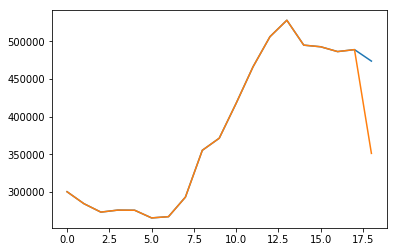

In [346]:
df5 = df4.groupby(['year']).mean().reset_index()
#df5.resale_price.plot(kind='line', figsize=(10,6))

plt.plot(df5.resale_price)

y2 = list(df5.resale_price)
y2[-1] = ypred.mean()
plt.plot(y2)

plt.show()


[]

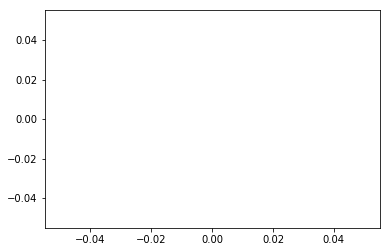

In [344]:
plt.plot(kind='')

In [317]:
sltd_idx = df4.query('WOODLANDS == 1').index

# .assign(year = lambda x: x.year.astype(int)).groupby('year').mean().resale_price.plot()

In [319]:
ypred[sltd_idx.tolist()]

KeyError: 'None of [[1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080]] are in the [index]'